In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.patches as patches
import os
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re
import datetime
import pandas as pd
import matplotlib.dates as mdates
import dask.array as da
import seaborn as sns

In [3]:
#ECMWF
directory = '/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/'
filename_pattern = r'fc_pf_\d{8}_\d{2}_sfc\.nc'

files = sorted([f for f in os.listdir(directory) if re.match(filename_pattern, f)])
files

['fc_pf_20210614_00_sfc.nc',
 'fc_pf_20210615_00_sfc.nc',
 'fc_pf_20210616_00_sfc.nc',
 'fc_pf_20210617_00_sfc.nc',
 'fc_pf_20210618_00_sfc.nc',
 'fc_pf_20210619_00_sfc.nc',
 'fc_pf_20210620_00_sfc.nc',
 'fc_pf_20210621_00_sfc.nc',
 'fc_pf_20210622_00_sfc.nc',
 'fc_pf_20210623_00_sfc.nc',
 'fc_pf_20210624_00_sfc.nc',
 'fc_pf_20210625_00_sfc.nc',
 'fc_pf_20210626_00_sfc.nc',
 'fc_pf_20210627_00_sfc.nc',
 'fc_pf_20210628_00_sfc.nc',
 'fc_pf_20210629_00_sfc.nc',
 'fc_pf_20210630_00_sfc.nc',
 'fc_pf_20210701_00_sfc.nc',
 'fc_pf_20210702_00_sfc.nc',
 'fc_pf_20210703_00_sfc.nc',
 'fc_pf_20210704_00_sfc.nc']

In [4]:
ds_ec = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210614_00_sfc.nc',engine = 'netcdf4')
ds_ec

<xarray.Dataset>
Dimensions:    (longitude: 481, latitude: 221, time: 57)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... -60.5 -60.25 -60.0
  * latitude   (latitude) float32 80.0 79.75 79.5 79.25 ... 25.5 25.25 25.0
  * time       (time) datetime64[ns] 2021-06-14 ... 2021-06-28
Data variables:
    sp         (time, latitude, longitude) float32 ...
    tcwv       (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-06-08 15:18:49 GMT by grib_to_netcdf-2.10.0: grib_to_n...

In [5]:
data_2 = ds_ec.t2m[0,0,0].values

data_2

array(273.72705078)

In [6]:
#check the data of fcn_era5
ds_fcn_21 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/2021_dt_list_ens_backtransformed.nc',engine = 'netcdf4')
#phony_dim_4-lat phony_dim_5-lon phony_dim_0-time phony_dim_2-leadtime phony_dim_1-pertubated members phony_dim_3:variables
ds_fcn_21

<xarray.Dataset>
Dimensions:      (phony_dim_3: 21, phony_dim_0: 21, phony_dim_1: 51,
                  phony_dim_2: 57, phony_dim_4: 220, phony_dim_5: 480)
Coordinates:
  * phony_dim_3  (phony_dim_3) int64 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19 0
  * phony_dim_0  (phony_dim_0) int64 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19 20
  * phony_dim_1  (phony_dim_1) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49 50
  * phony_dim_2  (phony_dim_2) int64 0 1 2 3 4 5 6 7 ... 49 50 51 52 53 54 55 56
  * phony_dim_4  (phony_dim_4) int64 0 1 2 3 4 5 6 ... 214 215 216 217 218 219
  * phony_dim_5  (phony_dim_5) int64 0 1 2 3 4 5 6 ... 474 475 476 477 478 479
Data variables:
    forecast     (phony_dim_0, phony_dim_1, phony_dim_2, phony_dim_3, phony_dim_4, phony_dim_5) float64 ...

In [13]:
data = ds_fcn_21.forecast[0,:,0,2,0,0]



data.values
#np.shape(data)

array([274.31857292, 274.31857292, 274.31857292, 274.31857292,
       274.31857292, 274.31857292, 274.31857292, 274.31857292,
       274.31857292, 274.31857292, 274.31857292, 274.31857292,
       274.31857292, 274.31857292, 274.31857292, 274.31857292,
       274.31857292, 274.31857292, 274.31857292, 274.31857292,
       274.31857292, 274.31857292, 274.31857292, 274.31857292,
       274.31857292, 274.31857292, 274.31857292, 274.31857292,
       274.31857292, 274.31857292, 274.31857292, 274.31857292,
       274.31857292, 274.31857292, 274.31857292, 274.31857292,
       274.31857292, 274.31857292, 274.31857292, 274.31857292,
       274.31857292, 274.31857292, 274.31857292, 274.31857292,
       274.31857292, 274.31857292, 274.31857292, 274.31857292,
       274.31857292, 274.31857292, 274.31857292])

In [21]:
ds_fcn_ecmwf = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210629_00_backtransformed.nc')
ds_fcn_ecmwf

<xarray.Dataset>
Dimensions:      (phony_dim_2: 21, phony_dim_0: 51, phony_dim_1: 57,
                  phony_dim_3: 220, phony_dim_4: 480)
Coordinates:
  * phony_dim_2  (phony_dim_2) int64 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19 0
  * phony_dim_0  (phony_dim_0) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49 50
  * phony_dim_1  (phony_dim_1) int64 0 1 2 3 4 5 6 7 ... 49 50 51 52 53 54 55 56
  * phony_dim_3  (phony_dim_3) int64 0 1 2 3 4 5 6 ... 214 215 216 217 218 219
  * phony_dim_4  (phony_dim_4) int64 0 1 2 3 4 5 6 ... 474 475 476 477 478 479
Data variables:
    forecast     (phony_dim_0, phony_dim_1, phony_dim_2, phony_dim_3, phony_dim_4) float64 ...

In [25]:
data_1 =ds_fcn_ecmwf.forecast[:,35,2,0,0]
data_1.values
#np.shape(data_1)

array([273.40454632, 274.00845564, 274.18443058, 273.30994058,
       274.01416119, 274.14622237, 274.03978157, 273.79410041,
       274.76921169, 274.16068832, 273.45809139, 275.29248192,
       273.57768062, 274.7368447 , 274.40017964, 273.24884089,
       273.66136563, 274.15108   , 274.20043753, 274.20026195,
       273.44523667, 273.09688021, 274.84589501, 273.46181188,
       274.76379569, 274.709585  , 274.80253992, 274.27892363,
       275.07578662, 274.45463807, 274.16209268, 274.66018149,
       273.85118272, 274.09741394, 273.68454825, 274.14525729,
       274.0347276 , 273.88680377, 274.6620213 , 274.20766013,
       273.70951098, 273.64214388, 272.64783575, 274.43760506,
       274.2781054 , 274.35024172, 274.12819555, 273.8713903 ,
       273.77795012, 273.99796333, 273.13035498])

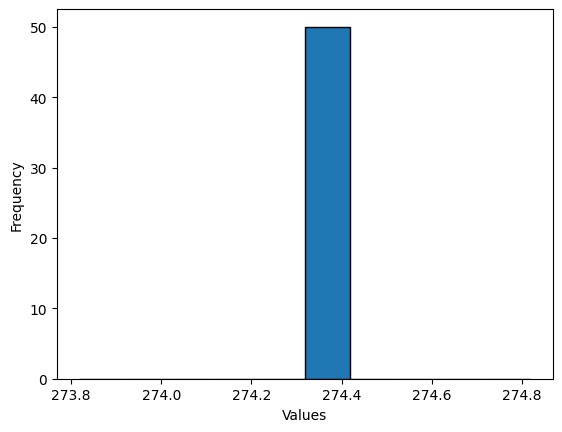

In [18]:
plt.hist(data, bins=10, edgecolor='k')
plt.xlabel('Values')
plt.ylabel('Frequency')
#plt.title('Histogram of Member Distribution')
plt.show()

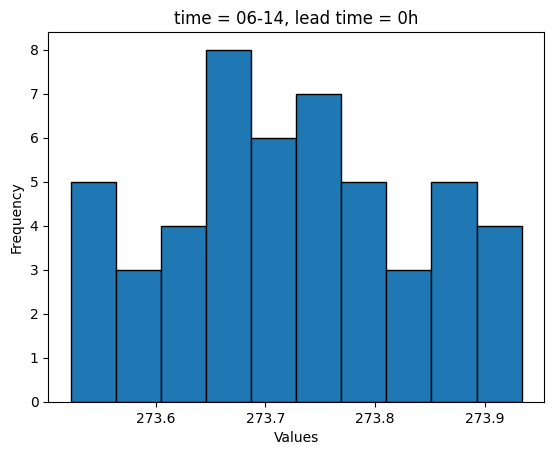

In [17]:
plt.hist(data_2, bins=10, edgecolor='k')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('time = 06-14, lead time = 0h',)
plt.show()